# Steam Data
## Overview
This Data is from the most popular pc gaming site called 'https://store.steampowered.com' you can purchase copy of a game, trade in-game items, review a game, play miltiplayer-games with friends and many other things.

### About the data
this data have 100 obervations and 8 variables.
<br>
`Steam id` : It contains the unique id of the game.
<br>
`Game` : Name of the game.
<br>
`Current players` : Currently number of players playing that game.
<br>
`Peak players today` : Maximum number of player observed in a perticual game on the day of the acquisition of data.
<br>
`Release date` : Date on which game got released.
<br>
`Release year` : Year on which game got released.
<br>
`Review summary` : Review of a user in placed ordinal ['Mixed' < 'Very Positive' < 'Mostly Positive' < 'Overwhelmingly Positive'].
<br>
`Total Review` : Number of reviews given by user.
<br>
`Tags` : Genre of the game.

# [EDA](#EDA)
## Questions that are answered in this Analysis
### [Univariate](#Univariate)
* [Top 10 games according to current players and peak players today.](#top)
* [Which game is the oldest?](#old)
* [Which game is latest?](#new)
* [Most reviewed game.](#high)
* [Least reviewed game.](#low)
* [Average Current players.](#avg)
* [Average players according to the day the data got aquired](#avg1)
* [Proportion of Reviews by the players.](#prop)
* [In which year most game got released?](#rel)

### [Bivariate](#Bivariate)
* [As the time passes doest the current players increased?](#bi1)
* [Those games got more Current players playing also tends to get more reviews?](#bi2)
* [those game got more total reviews also tends to get better review?](#bi3)




In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

In [292]:
steam = pd.read_csv('steam_top_100.csv')
display(steam.head())

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags
0,730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...
2,1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...
3,1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...
4,440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


In [293]:
#checking data type of each variable
print(steam.shape)
steam.dtypes

(100, 8)


Steam id                int64
Game                   object
Current players         int64
Peak players today      int64
Release date           object
Review summary         object
Total reviews         float64
Tags                   object
dtype: object

### observations
- Review summary is qualitative ordinal variable therefore its better to catagorize it. Also making new column of encoding.
- Change release date to 'datetime' data type
- One-Hot-Encoding to do the tags column

### Review summary

In [294]:
#check the unique value of Review Summary
print(steam['Review summary'].unique())

['Very Positive' 'Mostly Positive' 'Mixed' 'Overwhelmingly Positive' nan]


In [295]:
#check the NaN values
print(steam.isnull().sum())

Steam id              0
Game                  0
Current players       0
Peak players today    0
Release date          1
Review summary        1
Total reviews         1
Tags                  2
dtype: int64


- Getting rid of null values in Review summary
- Replacing the null value to the most frequent value in 'Review summary' variable.

In [296]:

#first categorize this variable
steam['Review summary'] = pd.Categorical(steam['Review summary'], ['Mixed','Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'], ordered = True)

#make new variable for Categorical encoding
steam['Review summary encoded'] = steam['Review summary'].cat.codes

print(steam['Review summary encoded'].mode())
print(steam['Review summary encoded'].unique())


0    1
dtype: int8
[ 1  2  0  3 -1]


- 'Very Positive' turn out to be the mode in this variable.

In [297]:
#Replacing nan value to 'Very positive'
steam = steam.fillna(value = {'Review summary': 'Very Positive'})
steam['Review summary encoded'] = steam['Review summary encoded'].replace('-1',1)
print(steam['Review summary'].unique())
print(steam['Review summary encoded'].unique())

['Very Positive', 'Mostly Positive', 'Mixed', 'Overwhelmingly Positive']
Categories (4, object): ['Mixed' < 'Very Positive' < 'Mostly Positive' < 'Overwhelmingly Positive']
[ 1  2  0  3 -1]


In [298]:
print(steam.dtypes)
steam.head()


Steam id                     int64
Game                        object
Current players              int64
Peak players today           int64
Release date                object
Review summary            category
Total reviews              float64
Tags                        object
Review summary encoded        int8
dtype: object


,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded
0,730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,1
1,570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...,1
2,1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...,2
3,1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...,1
4,440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,1


### Total Reviews
- Getting rid of null values in total reviews.
- Also changing data type to int.

In [299]:

steam = steam.fillna(value={'Total reviews':steam['Total reviews'].median()})
print(steam.isnull().sum())
steam['Total reviews'] = steam['Total reviews'].astype('int')
# steam.dtypes

#Total review datatype is now int

Steam id                  0
Game                      0
Current players           0
Peak players today        0
Release date              1
Review summary            0
Total reviews             0
Tags                      2
Review summary encoded    0
dtype: int64


### Release date
- Changing release date variable to datetime datatype.
- Make new column just for release year.

In [300]:
#filling na values in release date to unknown

steam = steam.fillna(value={'Release date':'2012-01-01'})
steam['Release date'] = pd.to_datetime(steam['Release date'])

print(steam.isna().sum())
print(steam.dtypes)

Steam id                  0
Game                      0
Current players           0
Peak players today        0
Release date              0
Review summary            0
Total reviews             0
Tags                      2
Review summary encoded    0
dtype: int64
Steam id                           int64
Game                              object
Current players                    int64
Peak players today                 int64
Release date              datetime64[ns]
Review summary                  category
Total reviews                      int32
Tags                              object
Review summary encoded              int8
dtype: object


In [301]:
#making new column just for release year
steam['Release year'] = steam['Release date'].dt.year
display(steam.head())

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Review summary encoded,Release year
0,730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,Very Positive,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,1,2012
1,570,Dota 2,580933,649690,2013-07-09,Very Positive,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...,1,2013
2,1063730,New World,243815,307146,2021-09-28,Mostly Positive,145931,Massively Multiplayer:Open World:MMORPG:Advent...,2,2021
3,1172470,Apex Legends,121313,245235,2020-11-04,Very Positive,338236,Free to Play:Battle Royale:Multiplayer:Shooter...,1,2020
4,440,Team Fortress 2,104477,111884,2007-10-10,Very Positive,821568,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,1,2007


In [302]:
#reordering columns
name = ['Steam id','Game','Current players','Peak players today','Release date','Release year','Review summary','Review summary encoded','Total reviews','Tags']
steam = steam.reindex(columns = name)
display(steam.head())

,Steam id,Game,Current players,Peak players today,Release date,Release year,Review summary,Review summary encoded,Total reviews,Tags
0,730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,2012,Very Positive,1,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,570,Dota 2,580933,649690,2013-07-09,2013,Very Positive,1,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...
2,1063730,New World,243815,307146,2021-09-28,2021,Mostly Positive,2,145931,Massively Multiplayer:Open World:MMORPG:Advent...
3,1172470,Apex Legends,121313,245235,2020-11-04,2020,Very Positive,1,338236,Free to Play:Battle Royale:Multiplayer:Shooter...
4,440,Team Fortress 2,104477,111884,2007-10-10,2007,Very Positive,1,821568,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


# EDA<a class="anchor" id="EDA"></a>

Top 10 games according to Current players.<a class="anchor" id="top"></a>

Text(0.5, 1.0, 'Top 10 Games According to Current Players')

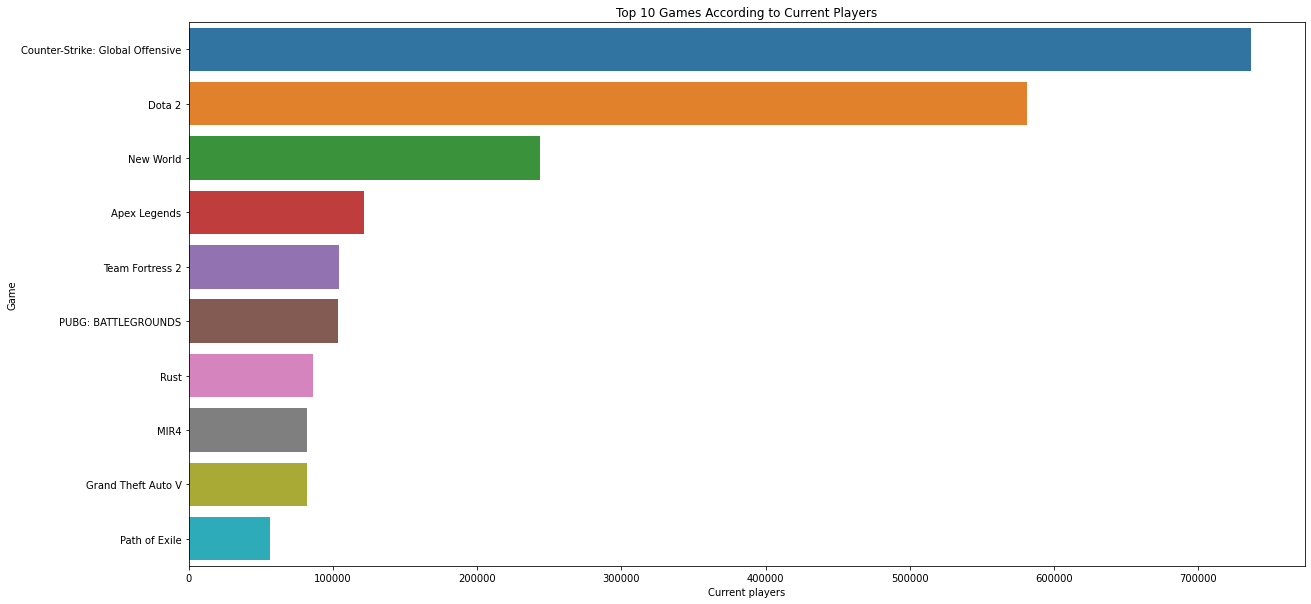

In [303]:
top = steam.sort_values('Current players', ascending= False).head(10)

plt.figure(figsize= (20,10))
sns.barplot(x = top['Current players'], y = top.Game)
plt.title('Top 10 Games According to Current Players')

Text(0.5, 1.0, 'Top 10 Games According to Peak players today')

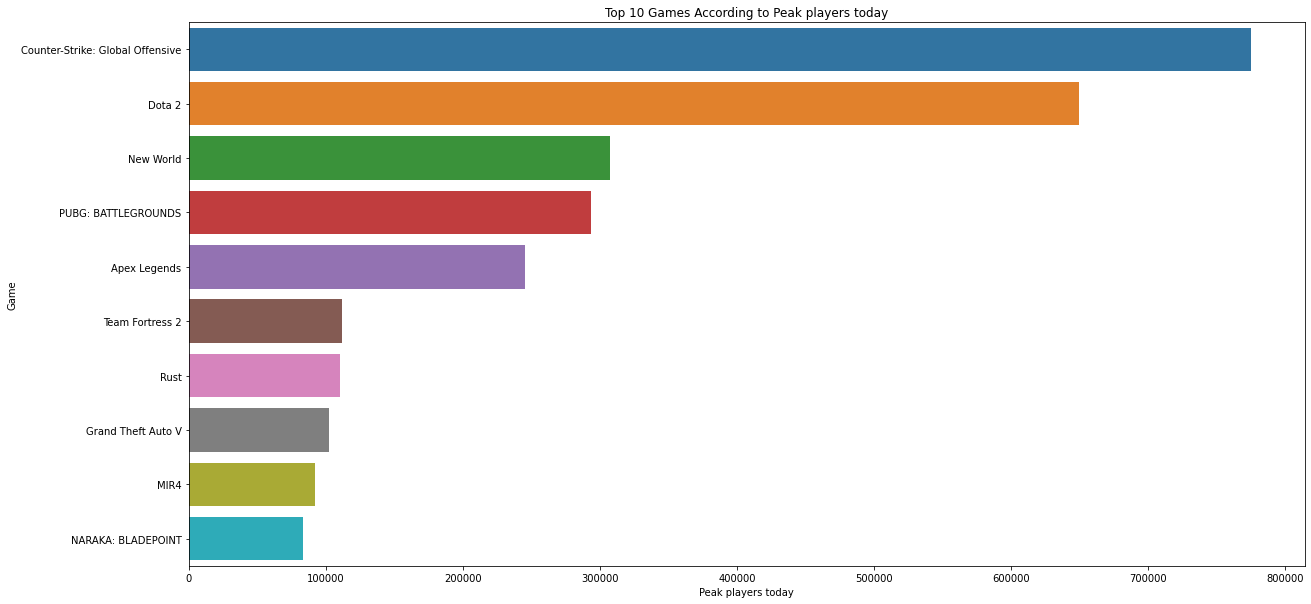

In [304]:
top = steam.sort_values('Peak players today', ascending= False).head(10)

plt.figure(figsize= (20,10))
sns.barplot(x = top['Peak players today'], y = top.Game)
plt.title('Top 10 Games According to Peak players today')

- Which Game is the oldest Release?<a class="anchor" id="old"></a>

In [305]:
display(steam.sort_values('Release date', ascending= True)[0:1])

print('\'Counter-Strke\' is the oldest game which was released in 2000-11-01')

,Steam id,Game,Current players,Peak players today,Release date,Release year,Review summary,Review summary encoded,Total reviews,Tags
55,10,Counter-Strike,15244,15752,2000-11-01,2000,Overwhelmingly Positive,3,111163,Action:FPS:Multiplayer:Shooter:Classic:Team-Ba...


'Counter-Strke' is the oldest game which was released in 2000-11-01


- Which Game is the newest Release?<a class="anchor" id="new"></a>

In [306]:
display(steam.sort_values('Release date', ascending= False)[0:1])

print('\'Football Manager 2022\' is the newest game which was released in 2021-11-09')

,Steam id,Game,Current players,Peak players today,Release date,Release year,Review summary,Review summary encoded,Total reviews,Tags
18,1569040,Football Manager 2022,40936,44497,2021-11-09,2021,Very Positive,1,1942,Sports:Management:Real Time Tactics:Soccer:Sim...


'Football Manager 2022' is the newest game which was released in 2021-11-09


- Which game got the Highest Number of Reviews?<a class="anchor" id="high"></a>

                                Game  Total reviews
0   Counter-Strike: Global Offensive        5993058
1                             Dota 2        1599180
5                PUBG: BATTLEGROUNDS        1530629
8                 Grand Theft Auto V        1102837
17    Tom Clancy's Rainbow Six Siege         831791
4                    Team Fortress 2         821568
31                          Terraria         657407
30                       Garry's Mod         640525
6                               Rust         554535
47          The Witcher 3: Wild Hunt         514840


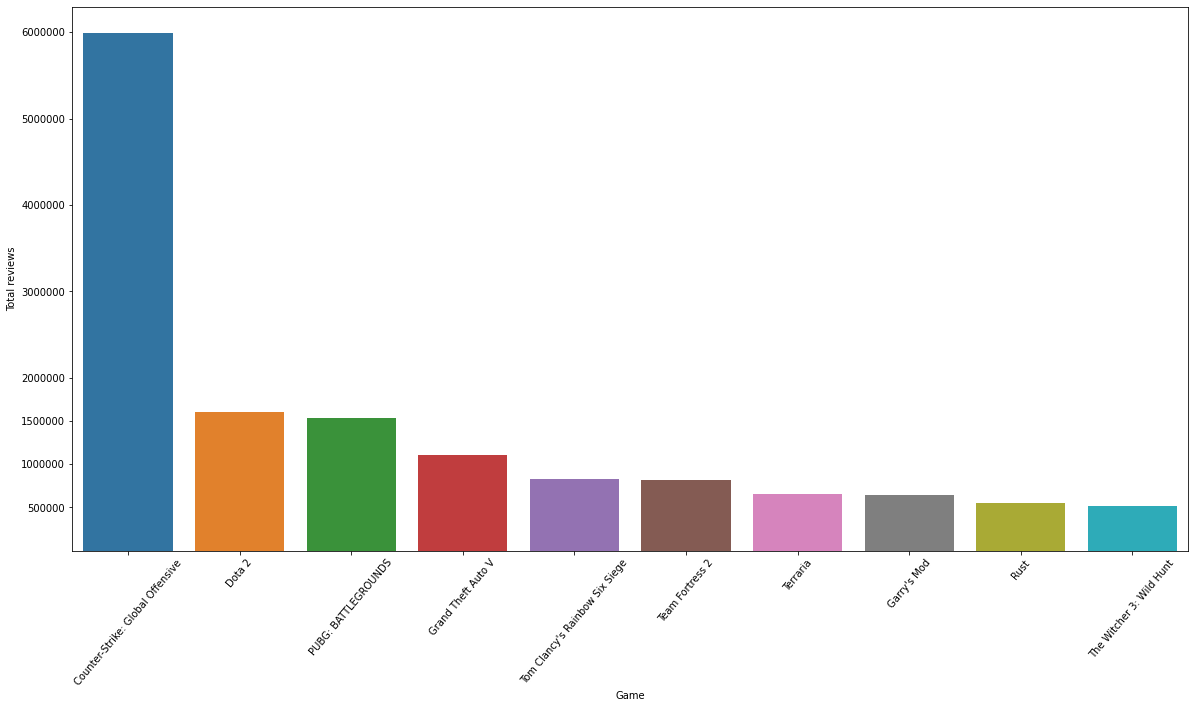

In [307]:
top1 = steam.sort_values('Total reviews', ascending= False).head(10)
print(top1[['Game','Total reviews']])

plt.figure(figsize= (20,10))
ax = plt.subplot(1,1,1)
ax = sns.barplot(x = top1.Game, y = top1['Total reviews'])
ax.set_yticks([500000,1000000,1500000,2000000,3000000,4000000,5000000,6000000])
ax.set_yticklabels([500000,1000000,1500000,2000000,3000000,4000000,5000000,6000000])
plt.xticks(rotation= 50)
plt.show()

- Which games got lowest number of reviews?<a class="anchor" id="low"></a>

                                  Game  Total reviews
13     Lost Ark Closed Technical Beta            1433
18               Football Manager 2022           1942
7                                 MIR4           5344
96                            NBA 2K22           6266
19                             FIFA 22           8969
77                             F1 2021           9492
94  Pathfinder: Wrath of the Righteous           9550
20                   Age of Empires IV           9709
80                        Back 4 Blood          12960
33               Football Manager 2021          13031


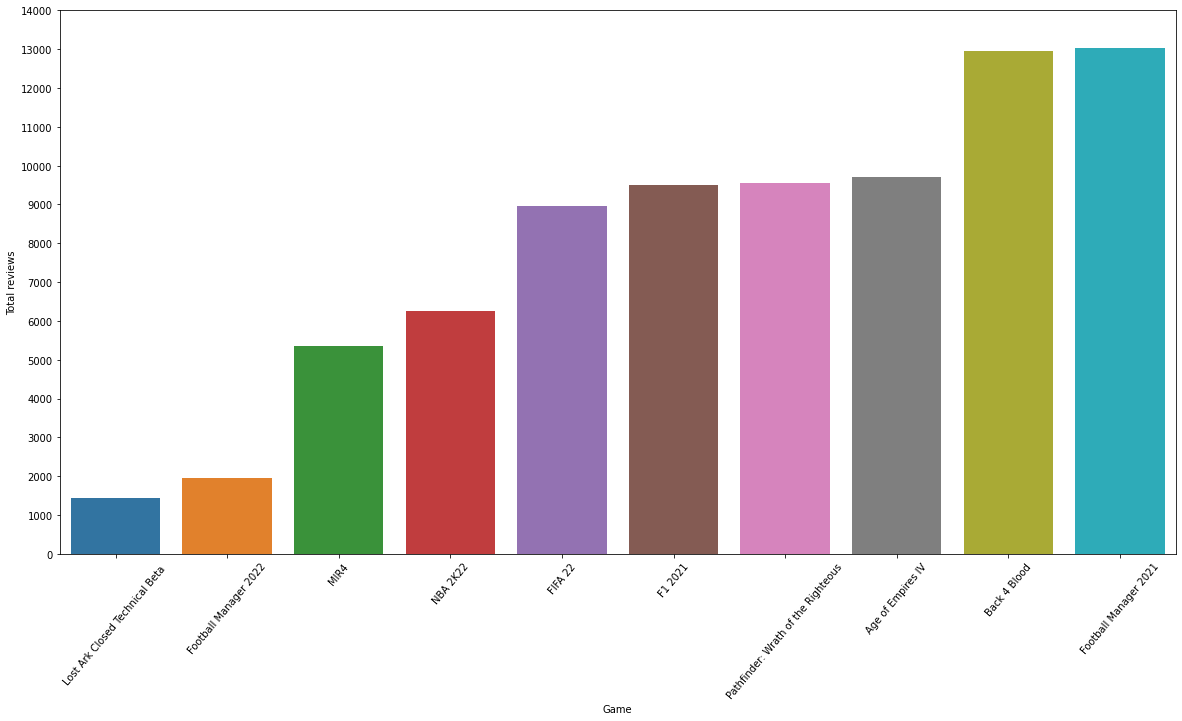

In [308]:
top2 = steam.sort_values('Total reviews', ascending= True).head(10)
print(top2[['Game','Total reviews']])

plt.figure(figsize= (20,10))
ax = plt.subplot(1,1,1)
ax = sns.barplot(x = top2.Game, y = top2['Total reviews'])
ax.set_yticks([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000])
plt.xticks(rotation= 50)
plt.show()

- Average Current players.<a class="anchor" id="avg"></a>

In [309]:
print(steam['Current players'].describe())

count       100.000000
mean      39954.370000
std       94808.092861
min        6724.000000
25%       10018.500000
50%       18012.000000
75%       32333.500000
max      736875.000000
Name: Current players, dtype: float64


<AxesSubplot:>

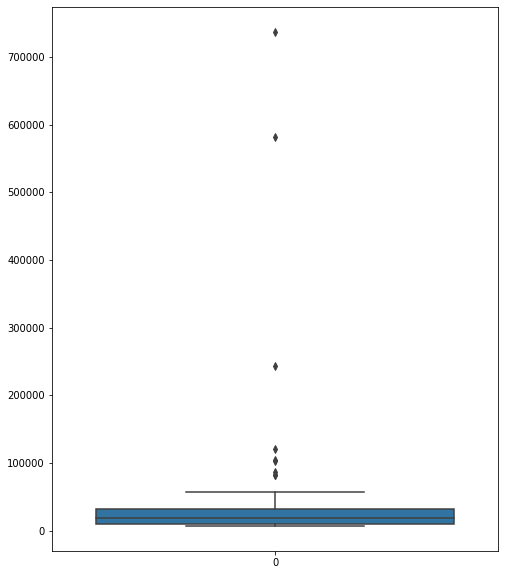

In [310]:
plt.figure(figsize=(8,10))
sns.boxplot(data = steam['Current players'])

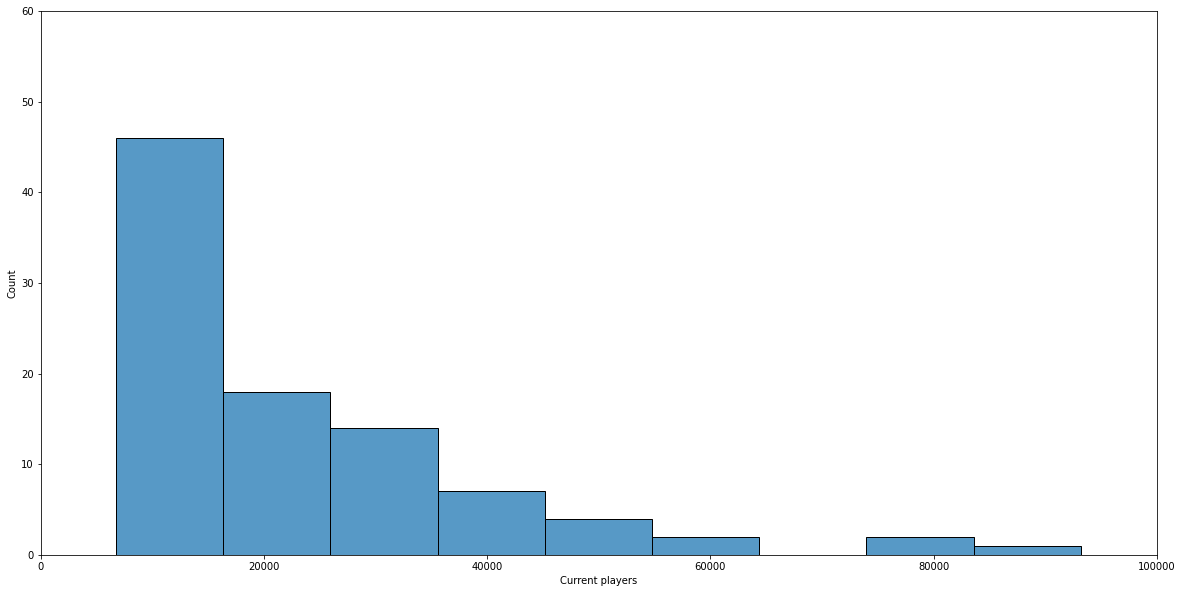

By looking at the central tendency of the data mean is 39954 and median is 18012 with the high standard variance of '94808', also further analysing the box plot and historam, We can see that data is highly skewed on the right and side because of many outliers plesent in the data therefore we can not go with the mean of the data, by looking at the historam and IQR the highest frequency of the players is between 10000 to 40000 with that we can assume that the Average Current player more likely to get around the mode which is '18012'


In [311]:
plt.figure(figsize=(20,10))
plt.axis([0,100000,0,60])
sns.histplot(steam['Current players'])
plt.show()

print('By looking at the central tendency of the data mean is 39954 and median is 18012 with the high standard variance of \'94808\', also further analysing the box plot and historam, We can see that data is highly skewed on the right and side because of many outliers plesent in the data therefore we can not go with the mean of the data, by looking at the historam and IQR the highest frequency of the players is between 10000 to 40000 with that we can assume that the Average Current player more likely to get around the mode which is \'18012\'')

Average number of players in a day.<a class="anchor" id="avg1"></a>

In [312]:
steam['Peak players today'].describe()

count       100.000000
mean      52364.190000
std      106888.744819
min        8707.000000
25%       15032.750000
50%       24493.000000
75%       43076.000000
max      775266.000000
Name: Peak players today, dtype: float64

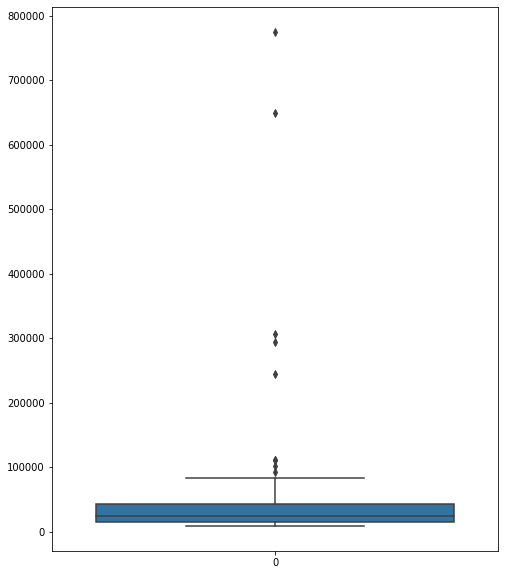

In [313]:
plt.figure(figsize=(8,10))
sns.boxplot(data = steam['Peak players today'])
plt.show()

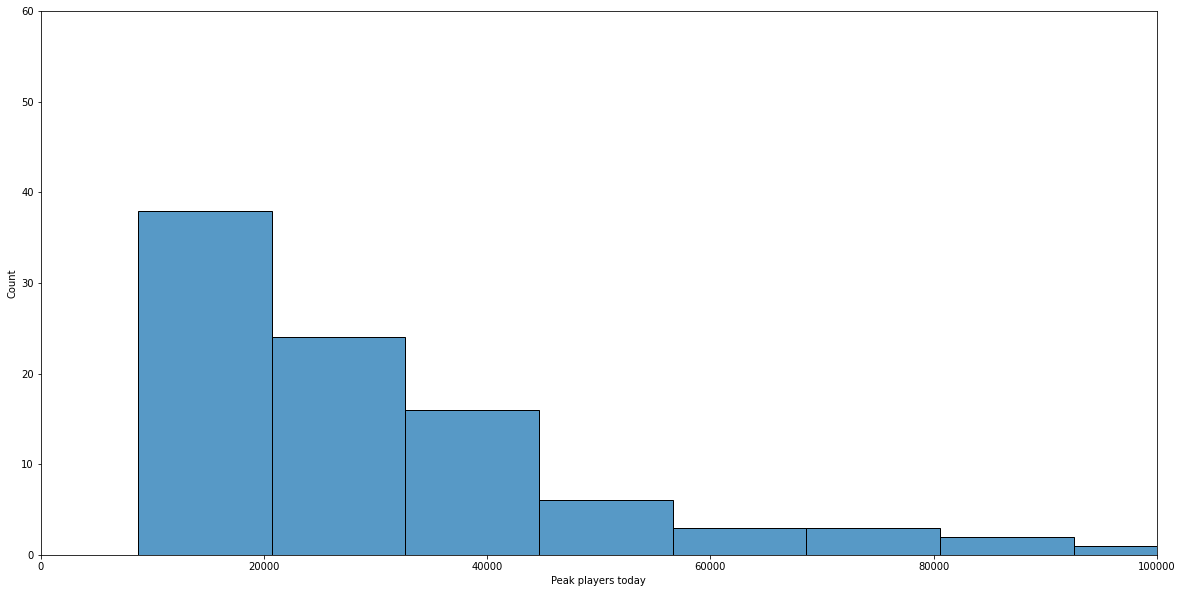

like 'Current players' the 'Peak players today' also higly skewed on the right with the high standard deviation of '106888', therefore we can not assume the mean as the average. After further analysing the boxplot and the histogram we can see that the highest freqency of the plyayers in a day is between 10000 to 30000 by looking at that we can conclude the Average player in a day is more likely to be median wich is '24493'


In [314]:
plt.figure(figsize=(20,10))
plt.axis([0,100000,0,60])
sns.histplot(steam['Peak players today'])
plt.show()

print('like \'Current players\' the \'Peak players today\' also higly skewed on the right with the high standard deviation of \'106888\', therefore we can not assume the mean as the average. After further analysing the boxplot and the histogram we can see that the highest freqency of the plyayers in a day is between 10000 to 30000 by looking at that we can conclude the Average player in a day is more likely to be median wich is \'24493\'')

- What is the most common review by the player and in how much propotion?<a class="anchor" id="prop"></a>

In [315]:
rev = steam['Review summary'].value_counts()
print(rev)
prop = rev/len(steam)
print(prop)

print('Most common Review given by the players is Very possitive which are 59 in the poportion of 59% among other reviews.')


Very Positive              59
Overwhelmingly Positive    25
Mostly Positive            12
Mixed                       4
Name: Review summary, dtype: int64
Very Positive              0.59
Overwhelmingly Positive    0.25
Mostly Positive            0.12
Mixed                      0.04
Name: Review summary, dtype: float64
Most common Review given by the players is Very possitive which are 59 in the poportion of 59% among other reviews.


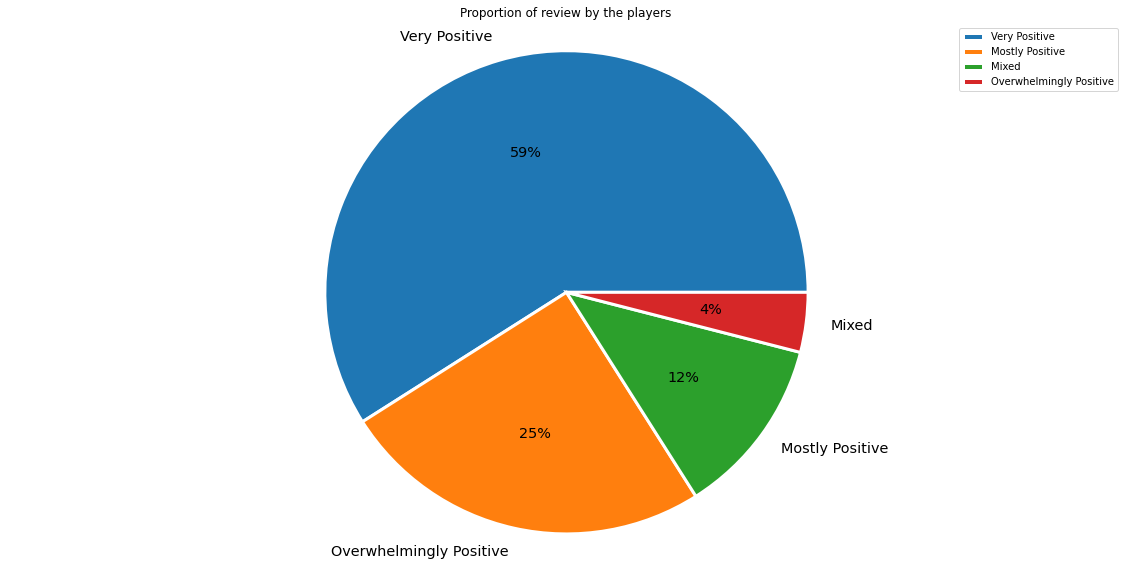

In [316]:

plt.figure(figsize=(20,10))
plt.pie(rev, labels= rev.index,autopct='%.0f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})
plt.legend(label)
plt.title('Proportion of review by the players')
plt.axis('equal')
plt.show()

In which year most games got released?<a class="anchor" id="rel"></a>

In [317]:
print(steam['Release year'].unique())
year = steam['Release year'].value_counts()
print(year)


[2012 2013 2021 2020 2007 2017 2018 2015 2016 2019 2014 2006 2011 2010
 2000 2009]
2020    18
2021    16
2017    11
2018    11
2016    10
2013     8
2015     8
2019     5
2014     4
2012     3
2007     1
2006     1
2011     1
2010     1
2000     1
2009     1
Name: Release year, dtype: int64


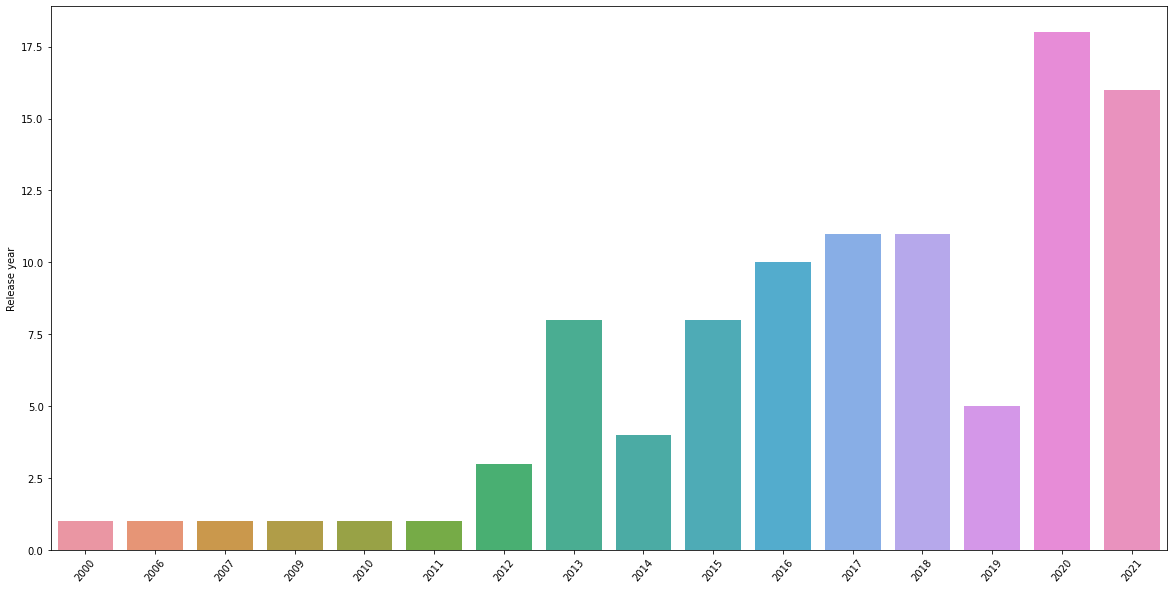

In [318]:
plt.figure(figsize=(20,10))
sns.barplot(x= year.index ,y = year)
plt.xticks(rotation=50)
plt.show()

## Bivariant

- Does current number of players increases as the new game releases in steam?<a class="anchor" id="bi1"></a>

,Steam id,Game,Current players,Peak players today,Release date,Release year,Review summary,Review summary encoded,Total reviews,Tags
0,730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,2012,Very Positive,1,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,570,Dota 2,580933,649690,2013-07-09,2013,Very Positive,1,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...


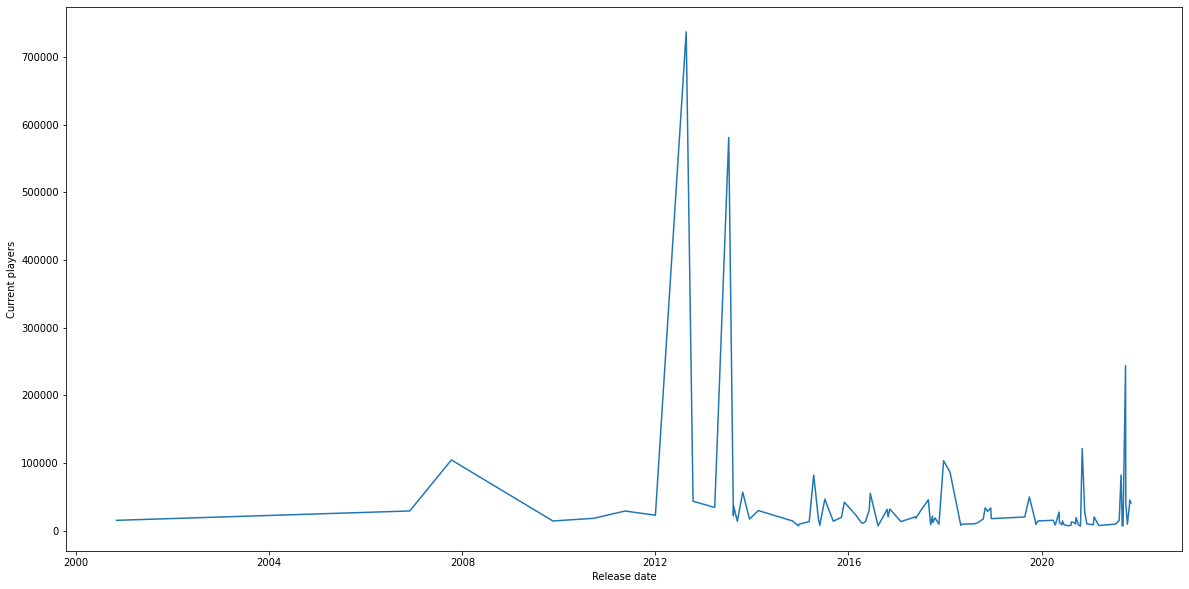

After analysing the data, there is no evidance that there is increase in the current players as the time goes, Though we can see there is sudden huge rise of current players in '2012-08-21' for the game 'Counter-Strike: Global Offensive' with the maximum current player of 736875, another surge of player after this is for the game called 'Dota 2' with the maximum current players of '649690' on the date of '2013-07-09'


In [319]:
display(steam.sort_values('Current players',ascending= False).head(2))

plt.figure(figsize=(20,10))
time = steam['Release date']
players_count = steam['Current players'] 
sns.lineplot(x = time, y = players_count)
plt.show()

print('After analysing the data, there is no evidance that there is increase in the current players as the time goes, Though we can see there is sudden huge rise of current players in \'2012-08-21\' for the game \'Counter-Strike: Global Offensive\' with the maximum current player of 736875, another surge of player after this is for the game called \'Dota 2\' with the maximum current players of \'649690\' on the date of \'2013-07-09\'')

- Does the review of the game more likely to increase when current nummber of player is more?<a class="anchor" id="bi2"></a>

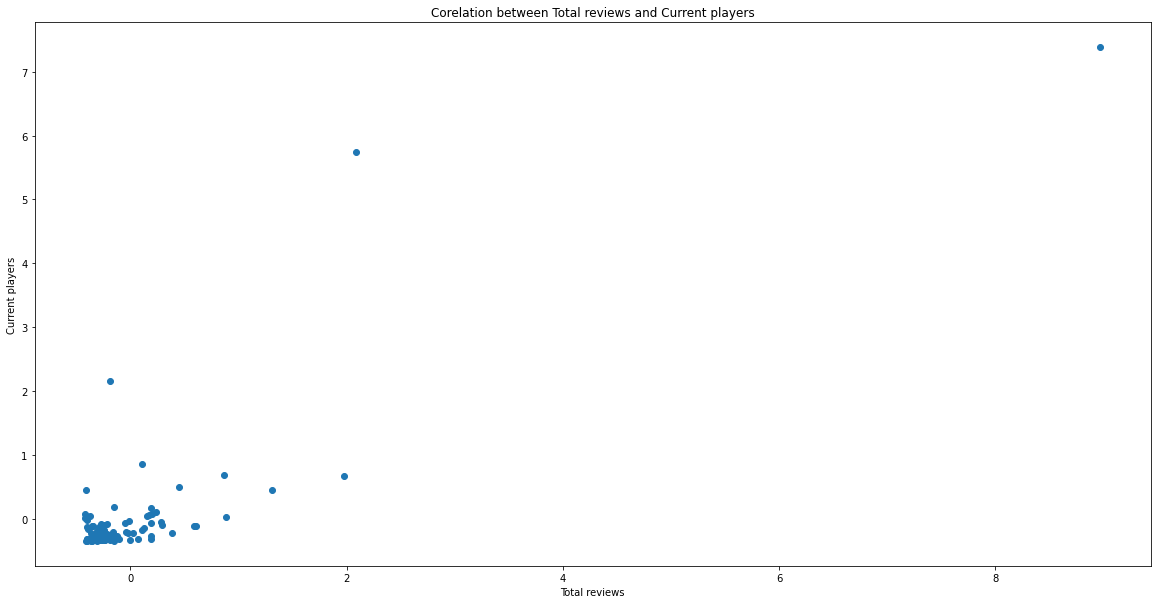

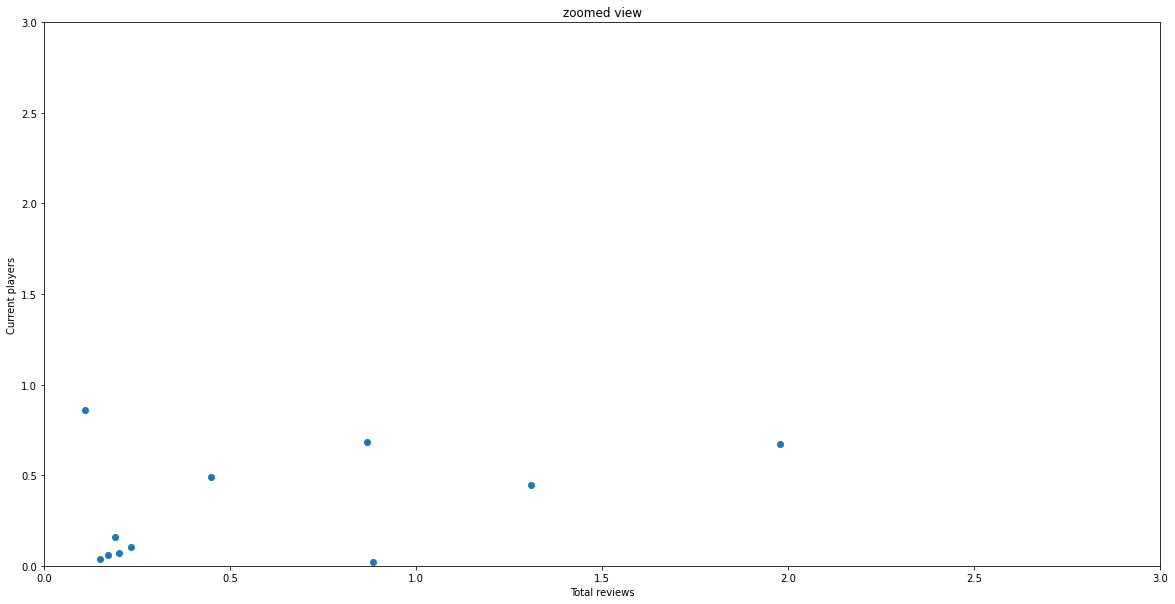

From the above analysis we get 0.8479386124540209 of positive corelation also in the scatter plot there is a high positive corelation between between 'Total reviews' and 'Current players'.


In [320]:
# Standardisation

data = steam[['Total reviews', 'Current players']].to_numpy()
scaler = StandardScaler()
standard_data = scaler.fit_transform(data)

plt.figure(figsize=(20,10))
x = standard_data[:,0]
y = standard_data[:,1]
plt.scatter(x,y)
plt.ylabel('Current players')
plt.xlabel('Total reviews')
plt.title('Corelation between Total reviews and Current players')
plt.show()
plt.figure(figsize=(20,10))
x = standard_data[:,0]
y = standard_data[:,1]
plt.axis([0,3,0,3])
plt.scatter(x,y)
plt.ylabel('Current players')
plt.xlabel('Total reviews')
plt.title('zoomed view')
plt.show()

corr ,p = pearsonr(steam['Total reviews'],steam['Current players'])



print('From the above analysis we get ' + str(corr) + ' of positive corelation also in the scatter plot there is a high positive corelation between between \'Total reviews\' and \'Current players\'.')

- Is there any association between Total reviews and Review summary<a class="anchor" id="bi3"></a>

<AxesSubplot:xlabel='Review summary', ylabel='Total reviews'>

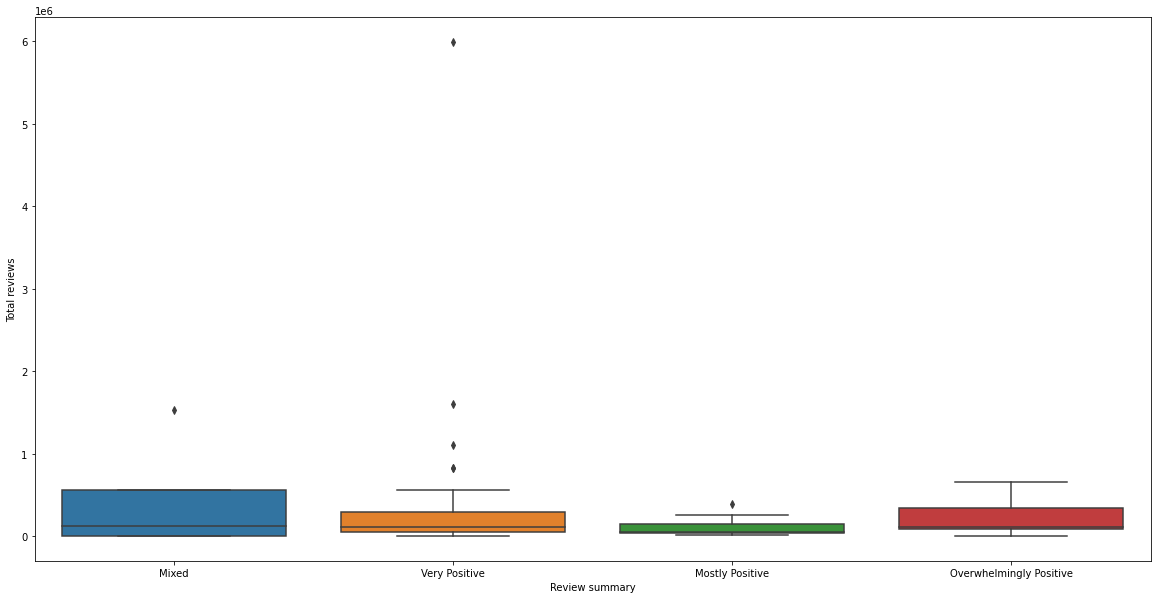

In [321]:
plt.figure(figsize=(20,10))
sns.boxplot(data = steam, x = 'Review summary', y = 'Total reviews')

C:\Users\Envy\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6767: RuntimeWarning: invalid value encountered in true_divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


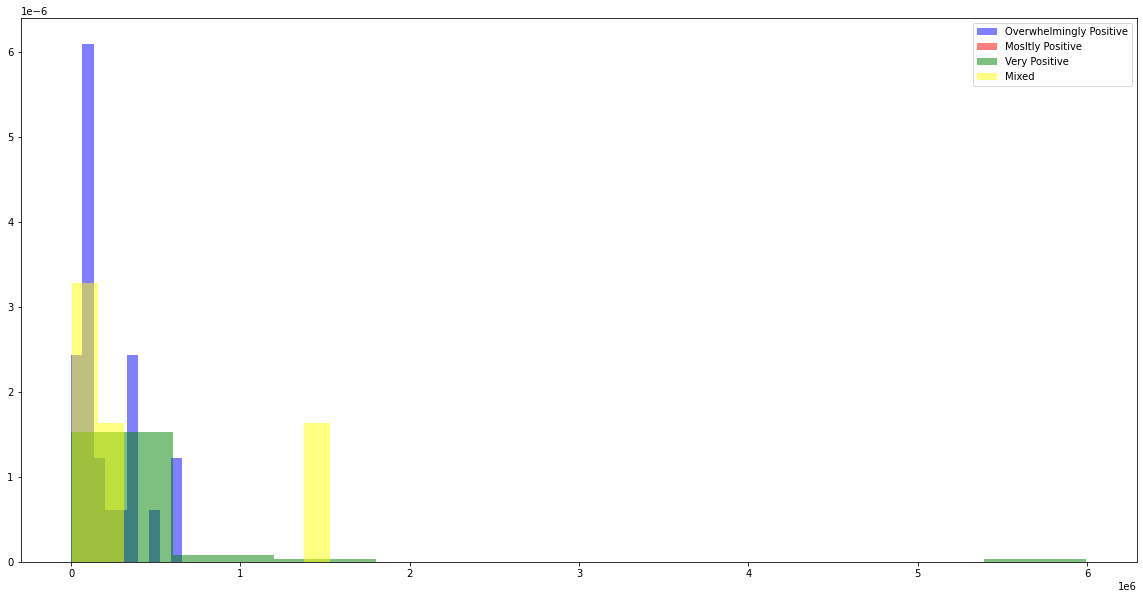

In [322]:
OP = steam['Total reviews'][steam['Review summary'] == 'Overwhelmingly Positive']
MP = steam['Total reviews'][steam['Review summary'] == 'Mosltly Positive']
VP = steam['Total reviews'][steam['Review summary'] == 'Very Positive']
Mix = steam['Total reviews'][steam['Review summary'] == 'Mixed']


plt.figure(figsize=(20,10))
plt.hist(OP , color="blue", label="Overwhelmingly Positive", density= True,stacked = True, alpha=0.5)
plt.hist(MP , color="red", label="Mosltly Positive", density= True,stacked = True, alpha=0.5)
plt.hist(VP , color="green", label="Very Positive", density= True,stacked = True, alpha=0.5)
plt.hist(Mix , color="yellow", label="Mixed", density= True,stacked = True, alpha=0.5)
plt.legend()
plt.show()

# Feature engineering
### Tags
- One-Hot-Encoding for tags variable.

In [323]:
# replacing nan values to 'no_genre'
only_tags=steam.loc[:,"Tags"]
only_tags.fillna(value='no_genre',inplace=True)
only_tags.head(15)

0     FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1     Free to Play:MOBA:Multiplayer:Strategy:eSports...
2     Massively Multiplayer:Open World:MMORPG:Advent...
3     Free to Play:Battle Royale:Multiplayer:Shooter...
4     Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...
5     Survival:Shooter:Multiplayer:Battle Royale:FPS...
6     Survival:Crafting:Multiplayer:Open World:Open ...
7     PvE:PvP:Demons:MMORPG:Martial Arts:RPG:Action ...
8     Open World:Action:Multiplayer:Automobile Sim:C...
9     Free to Play:Action RPG:Hack and Slash:RPG:Mul...
10    Horror:Survival Horror:Multiplayer:Online Co-O...
11    Free to Play:PvP:Open World:FPS:Looter Shooter...
12    Multiplayer:Soccer:Competitive:Sports:Racing:T...
13                                             no_genre
14    Open World Survival Craft:Survival:Open World:...
Name: Tags, dtype: object

In [324]:
all_tags=set()
for tag_list in only_tags:
    iter = tag_list.split(':')
    for new_tag in iter:
        all_tags.add(new_tag)
all_tags=list(all_tags)
all_tags.sort()
all_tags.remove('no_genre')
print(all_tags)

['1980s', "1990's", '2D', '2D Fighter', '2D Platformer', '3D', '3D Platformer', '3D Vision', '4 Player Local', '4X', 'Action', 'Action RPG', 'Action RTS', 'Action Roguelike', 'Action-Adventure', 'Addictive', 'Adventure', 'Agriculture', 'Alternate History', 'Animation & Modeling', 'Anime', 'Arcade', 'Artificial Intelligence', 'Assassin', 'Atmospheric', 'Audio Production', 'Automation', 'Automobile Sim', 'Base Building', 'Basketball', 'Battle Royale', 'Beautiful', 'Blood', 'Building', 'Bullet Hell', 'CRPG', 'Capitalism', 'Card Game', 'Cartoon', 'Cartoony', 'Casual', 'Character Customization', 'Choices Matter', 'Choose Your Own Adventure', 'Cinematic', 'City Builder', 'Class-Based', 'Classic', 'Clicker', 'Co-op', 'Co-op Campaign', 'Cold War', 'Collectathon', 'Colony Sim', 'Colorful', 'Combat', 'Comedy', 'Competitive', 'Controller', 'Cooking', 'Crafting', 'Crime', 'Cute', 'Cyberpunk', 'Dark', 'Dark Comedy', 'Dark Fantasy', 'Dating Sim', 'Deckbuilding', 'Demons', 'Design & Illustration', 'D

In [325]:
tag_df = pd.DataFrame(columns=all_tags)
tag_df.tail(10)
print(steam.isna().sum())

Steam id                  0
Game                      0
Current players           0
Peak players today        0
Release date              0
Release year              0
Review summary            0
Review summary encoded    0
Total reviews             0
Tags                      0
dtype: int64


In [326]:

steam_new = pd.concat([steam,tag_df],axis=1)
steam_new = steam_new.replace(np.nan, '0')
display(steam_new.head(10))
print(steam_new.dtypes)
print(steam_new.isna().sum())


,Steam id,Game,Current players,Peak players today,Release date,Release year,Review summary,Review summary encoded,Total reviews,Tags,...,VR,Violent,Voxel,Walking Simulator,War,Warhammer 40K,Western,World War II,Zombies,eSports
0,730,Counter-Strike: Global Offensive,736875,775266,2012-08-21,2012,Very Positive,1,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,...,0,0,0,0,0,0,0,0,0,0
1,570,Dota 2,580933,649690,2013-07-09,2013,Very Positive,1,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...,...,0,0,0,0,0,0,0,0,0,0
2,1063730,New World,243815,307146,2021-09-28,2021,Mostly Positive,2,145931,Massively Multiplayer:Open World:MMORPG:Advent...,...,0,0,0,0,0,0,0,0,0,0
3,1172470,Apex Legends,121313,245235,2020-11-04,2020,Very Positive,1,338236,Free to Play:Battle Royale:Multiplayer:Shooter...,...,0,0,0,0,0,0,0,0,0,0
4,440,Team Fortress 2,104477,111884,2007-10-10,2007,Very Positive,1,821568,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,...,0,0,0,0,0,0,0,0,0,0
5,578080,PUBG: BATTLEGROUNDS,103354,293759,2017-12-21,2017,Mixed,0,1530629,Survival:Shooter:Multiplayer:Battle Royale:FPS...,...,0,0,0,0,0,0,0,0,0,0
6,252490,Rust,86156,110489,2018-02-08,2018,Very Positive,1,554535,Survival:Crafting:Multiplayer:Open World:Open ...,...,0,0,0,0,0,0,0,0,0,0
7,1623660,MIR4,82361,91872,2021-08-25,2021,Mixed,0,5344,PvE:PvP:Demons:MMORPG:Martial Arts:RPG:Action ...,...,0,0,0,0,0,0,0,0,0,0
8,271590,Grand Theft Auto V,82189,102182,2015-04-13,2015,Very Positive,1,1102837,Open World:Action:Multiplayer:Automobile Sim:C...,...,0,0,0,0,0,0,0,0,0,0
9,238960,Path of Exile,56781,66571,2013-10-23,2013,Very Positive,1,172981,Free to Play:Action RPG:Hack and Slash:RPG:Mul...,...,0,0,0,0,0,0,0,0,0,0


Steam id                       int64
Game                          object
Current players                int64
Peak players today             int64
Release date          datetime64[ns]
                           ...      
Warhammer 40K                 object
Western                       object
World War II                  object
Zombies                       object
eSports                       object
Length: 259, dtype: object
Steam id              0
Game                  0
Current players       0
Peak players today    0
Release date          0
                     ..
Warhammer 40K         0
Western               0
World War II          0
Zombies               0
eSports               0
Length: 259, dtype: int64


In [327]:
for ind,row in enumerate(steam_new.loc[:,'Tags']):
    par = row.split(':')
    for tag in par:
        if(tag in steam_new.columns[8:]):
            steam_new.iloc[ind,steam_new.columns.get_loc(tag)]=1
steam_new.tail(10)


# steam_new.to_excel("some_data.xlsx")

,Steam id,Game,Current players,Peak players today,Release date,Release year,Review summary,Review summary encoded,Total reviews,Tags,...,VR,Violent,Voxel,Walking Simulator,War,Warhammer 40K,Western,World War II,Zombies,eSports
90,632360,Risk of Rain 2,8220,11724,2020-08-11,2020,Overwhelmingly Positive,3,112385,Third-Person Shooter:Action Roguelike:Multipla...,...,0,0,0,0,0,0,0,0,0,0
91,242760,The Forest,7918,11706,2018-04-30,2018,Very Positive,1,264327,Open World Survival Craft:Survival:Open World:...,...,0,0,0,0,0,0,0,0,1,0
92,284160,BeamNG.drive,7874,10572,2015-05-29,2015,Overwhelmingly Positive,3,85999,Simulation:Driving:Physics:Destruction:Automob...,...,0,0,0,0,0,0,0,0,0,0
93,1293830,Forza Horizon 4,7606,9552,2021-03-09,2021,Very Positive,1,69892,Racing:Open World:Driving:Multiplayer:Online C...,...,0,0,0,0,0,0,0,0,0,0
94,1184370,Pathfinder: Wrath of the Righteous,7182,10242,2021-09-02,2021,Very Positive,1,9550,CRPG:Story Rich:Tactical RPG:RPG:Character Cus...,...,0,0,0,0,0,0,0,0,0,0
95,1286830,STAR WARS™: The Old Republic™,7104,9345,2020-07-21,2020,Very Positive,1,33098,Free to Play:MMORPG:Character Customization:Mu...,...,0,0,0,0,0,0,0,0,0,0
96,1644960,NBA 2K22,7020,13139,2021-09-09,2021,Mixed,0,6266,Sports:Basketball:Simulation:eSports:Realistic...,...,0,0,0,0,0,0,0,0,0,1
97,244210,Assetto Corsa,6965,8707,2014-12-19,2014,Very Positive,1,42497,Racing:Automobile Sim:Simulation:Driving:Reali...,...,1,0,0,0,0,0,0,0,0,0
98,275850,No Man's Sky,6963,10122,2016-08-12,2016,Mostly Positive,2,168792,Open World:Open World Survival Craft:Space:Exp...,...,0,0,0,0,0,0,0,0,0,0
99,1238810,Battlefield™ V,6724,33310,2020-10-22,2020,Mostly Positive,2,68109,FPS:World War II:Shooter:Multiplayer:War:Singl...,...,0,1,0,0,1,0,0,1,0,0
